In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

In [38]:
datos = pd.read_csv('datos_energia.csv',delimiter=';')

In [39]:
#datos preliminares
h_i = 25
masa = 35.9
s_1 = 0.1
s_2 = 0.1
h_1 =datos['h']
x_1 = datos['x_1']
x_2 = datos['x_2']
x_3 = datos['x_3']
x_prom = [np.mean([x_1[i],x_2[i],x_3[i]]) for i in range(len(x_1))]

tabla = pd.DataFrame({'h_1':h_1,'x_1':x_1,'x_2':x_2,'x_3':x_3, 'x_prom':x_prom})
tabla

,h_1,x_1,x_2,x_3,x_prom
0,13,37.5,36.0,37.6,37.033333
1,20,45.8,45.5,44.9,45.400000
2,25,51.8,52.0,50.5,51.433333
3,35,58.4,61.6,60.8,60.266667


In [79]:
#cantidades adimensionales

def gamma(a):
    return a/h_i

def z(x):
    return (x/h_i)**2

gamma_1 = np.array([gamma(h_1[i]) for i in range(len(h_1))])
z_1 = np.array([z(x_1[i]) for i in range(len(x_1))])

tabla['gamma'] = gamma_1
tabla['z'] = z_1
tabla

,h_1,x_1,x_2,x_3,x_prom,gamma,z
0,13,37.5,36.0,37.6,37.033333,0.52,2.250000
1,20,45.8,45.5,44.9,45.400000,0.80,3.356224
2,25,51.8,52.0,50.5,51.433333,1.00,4.293184
3,35,58.4,61.6,60.8,60.266667,1.40,5.456896


In [98]:
#incertidumbre

def incerti_gamma(h,h_i):
    def partial_h(h_i):
        return 1/h_i
    def partial_h_i(h,h_i):
        return -h/(h_i**2)
    return np.sqrt((partial_h(h_i)*s_1)**2 + (partial_h_i(h,h_i)*s_2)**2)

def incerti_z(x,h):
    def partial_x(x,h):
        return 2*x/(h**2)
    def partial_h(x,h):
        return -2*x**2/(h**3)
    return np.sqrt((partial_x(x,h)*s_1)**2 + (partial_h(x,h)*s_2)**2)



inc_gamma = np.array([incerti_gamma(h_1[i],h_i) for i in range(len(h_1))])
inc_z = np.array([incerti_z(x_1[i],h_i) for i in range(len(h_1))])

tabla['inc_gamma'] = inc_gamma
tabla['inc_z'] = inc_z
tabla

,h_1,x_1,x_2,x_3,x_prom,gamma,z,inc_gamma,inc_z
0,13,37.5,36.0,37.6,37.033333,0.52,2.250000,0.004508,0.021633
1,20,45.8,45.5,44.9,45.400000,0.80,3.356224,0.005122,0.030589
2,25,51.8,52.0,50.5,51.433333,1.00,4.293184,0.005657,0.038136
3,35,58.4,61.6,60.8,60.266667,1.40,5.456896,0.006882,0.047487


In [76]:
reg_e = regresion_1(gamma_1,z_1)

slope: 3.6671248296007786
intercept: 0.42864990847127515
r: 0.9948355067569346
R^2: 0.9896976855043268
p: 0.00516449324306545
std_err: 0.26456160717435073


In [78]:
def error_relativo(x,y):
    return abs((x-y)/x)*100

error_lab = error_relativo(3.6671248296007786,4)
error_lab

9.077279500067084

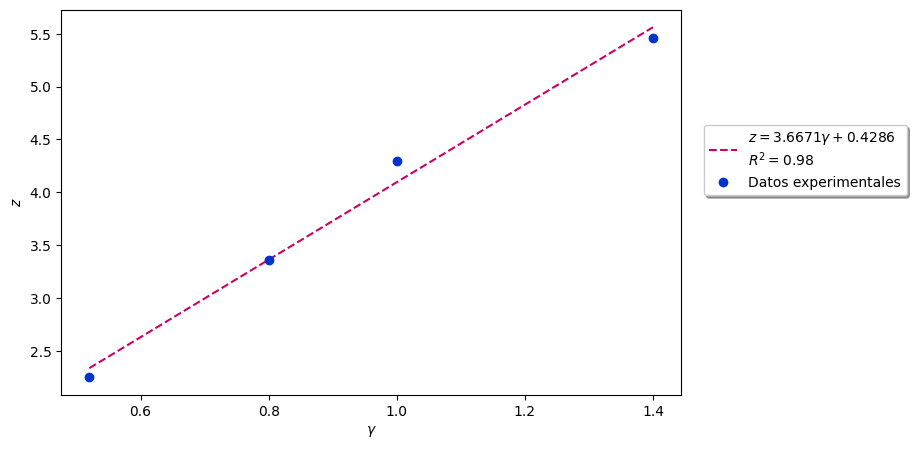

In [102]:
fig = plt.figure(figsize=(8,5))
plt.plot(gamma_1,reg_e,color='#cc0066',linestyle='--',label=r'$z = 3.6671\gamma + 0.4286$'+f'\n$R^2 = 0.98$')
plt.plot(gamma_1,z_1,'o',color='#0033cc', label='Datos experimentales')
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$z$')
plt.legend(loc='lower center',bbox_to_anchor=(1.2, 0.5), ncol=1,shadow=True, fancybox=True)
plt.savefig('lab_energia.png', dpi = 300, bbox_inches = 'tight')
plt.show()